# CSE 156: Statistical NLP UCSD Assignment 2
## Exploring Word Vectors (12.5 points + 2 bonus points)
### <font color='blue'> Due 11:59pm, Monday April 18, 2022 </font>


Before you start, make sure you read the README.txt in the same directory as this notebook.


**Notes:** Please make sure to save the notebook as you go along. Submission Instructions are located at the bottom of the notebook.

In [47]:
# All Import Statements Defined Here
# Note: Do not add to this list.
# ----------------

import sys
assert sys.version_info[0]==3
assert sys.version_info[1] >= 5

from gensim.models import KeyedVectors
from gensim.test.utils import datapath
import pprint
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]
import nltk
import numpy as np
import random
import scipy as sp
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
START_TOKEN = '<START>'
END_TOKEN = '<END>'

np.random.seed(0)
random.seed(0)
# ----------------

## Word Vectors

Word Vectors are often used as a fundamental component for downstream NLP tasks, e.g. question answering, text generation, translation, etc., so it is important to build some intuitions as to their strengths and weaknesses. Here, you will explore word vectors derived from *Word2Vec*. 

**Note on Terminology:** The terms "word vectors" and "word embeddings" are often used interchangeably. The term "embedding" refers to the fact that we are encoding aspects of a word's meaning in a lower dimensional space. As [Wikipedia](https://en.wikipedia.org/wiki/Word_embedding) states, "*conceptually it involves a mathematical embedding from a space with one dimension per word to a continuous vector space with a much lower dimension*".

## Word Vectors 

---



We shall explore the embeddings produced by word2vec. Please revisit the class notes and lecture slides for more details on the word2vec algorithm. Paper 1 review due May 4th, involves reading the  [word2vec  paper](https://proceedings.neurips.cc/paper/2013/file/9aa42b31882ec039965f3c4923ce901b-Paper.pdf),  reading it now might help you with this assignment.

Run the following cells to load the word2vec vectors into memory. **Note**: If this is your first time to run these cells, i.e. download the embedding model, it will take a couple minutes to run. If you've run these cells before, rerunning them will load the model without redownloading it, which will take about 1 to 2 minutes. In *Colab*, the embeddings are downloaded to the server everytime you restart the notebook). For this reason, you may prefer to work on your local machine where the download only happens once.

In [48]:
def load_embedding_model():
    """ Load Word2Vec Vectors
        Return:
            wv_from_bin: All the embeddings
    """
    import gensim.downloader as api
    wv_from_bin = api.load("word2vec-google-news-300")

    #print("Loaded vocab size %i" % len(wv_from_bin.vocab.keys()))
    return wv_from_bin

In [49]:
# -----------------------------------
# Run Cell to Load Word Vectors
# Note: This will take a couple minutes
# -----------------------------------
wv_from_bin = load_embedding_model()

#### Note: If you are receiving a "reset by peer" error, rerun the cell to restart the download. 


### Plot function
Let's define a plot function that reduces the vectors from 300-dimensions to 2-dimensions, and visualises them.

In [50]:
def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.key_to_index.keys()), sample)
        else:
            words = [ word for word in model.vocab ]
        
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(10,10))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

### Question 1: Word2vec Plot Analysis [written] (2 points)

Run the cell below to plot the 2D GloVe embeddings for `['barrels', 'bpd', 'ecuador', 'energy', 'industry', 'kuwait', 'oil', 'output', 'petroleum', 'iraq']`.

What clusters together in 2-dimensional embedding space? What doesn't cluster together that you think should have?

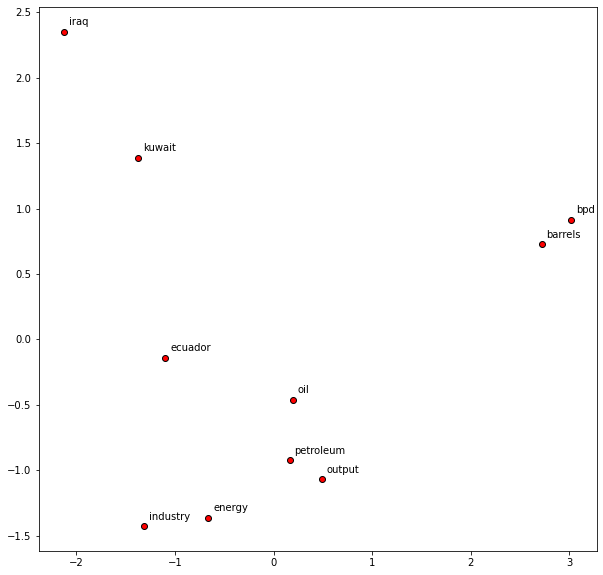

In [51]:
words = ['barrels', 'bpd', 'ecuador', 'energy', 'industry', 'kuwait', 'oil', 'output', 'petroleum', 'iraq']
display_pca_scatterplot(wv_from_bin, words)

#### <font color="red">Write your answer here.</font>
I think country is one cluster such as Iraq, Kuwait. Unit for oil such as barrels and bqd is another cluster. Gas industry related words such as oil, petroleum and output are another cluster. General terms such as industry and energy cluster together. I think Ecuador should get closer to and cluster with Kuwait and Iraq as it's also a country name.



### Cosine Similarity
Now that we have word vectors, we need a way to quantify the similarity between individual words, according to these vectors. One such metric is cosine-similarity. We will be using this to find words that are "close" and "far" from one another.

The [Cosine Similarity](https://en.wikipedia.org/wiki/Cosine_similarity) $s$ between two vectors $p$ and $q$ is defined as:

$$s = \frac{p \cdot q}{||p|| ||q||}, \textrm{ where } s \in [-1, 1] $$ 

### Question 2: Words with Multiple Meanings (2 points) [code + written] 
Polysemes and homonyms are words that have more than one meaning (see this [wiki page](https://en.wikipedia.org/wiki/Polysemy) to learn more about the difference between polysemes and homonyms ). Find a word with *at least two different meanings* such that the top-10 most similar words (according to cosine similarity) contain related words from *both* meanings. For example, "leaves" has both "go_away" and "a_structure_of_a_plant" meaning in the top 10, and "rock" has both "music" and "stone". You will probably need to try several polysemous or homonymic words before you find one. 

Please state the word you discover and the multiple meanings that occur in the top 10. Why do you think many of the polysemous or homonymic words you tried didn't work (i.e. the top-10 most similar words only contain **one** of the meanings of the words)?

**Note**: You should use the `wv_from_bin.most_similar(word)` function to get the top 10 similar words. This function ranks all other words in the vocabulary with respect to their cosine similarity to the given word. For further assistance, please check the __[GenSim documentation](https://radimrehurek.com/gensim/models/keyedvectors.html#gensim.models.keyedvectors.FastTextKeyedVectors.most_similar)__.

In [58]:
    # ------------------
    # Write your implementation here.
    wv_from_bin.most_similar('fall')
    # ------------------

[('falling', 0.6371317505836487),
 ('falls', 0.6107184290885925),
 ('drop', 0.591251790523529),
 ('tumble', 0.5696445107460022),
 ('rise', 0.5596301555633545),
 ('plummet', 0.5581283569335938),
 ('fell', 0.5548586845397949),
 ('spring', 0.541506826877594),
 ('Fall', 0.5406967401504517),
 ('sag', 0.5160202383995056)]

#### <font color="red">Write your answer here.</font>
I found fall. fall can mean one of the seasons and that's why we see spring and Fall in the list. Fall can also mean action tumble and that's why we see fall, drop pulmmet in the list too<br>
I think one meaning of a specific polysemous words doesn't appear as frequent as the other one thus in the training data there aren't enough data for that meaning.Therefore, the most_similar words would only contain related words for the most frequent meaning for the polysemous word. <br>
I think it could also be that among the top 10 similar words, the top ones are variants of the original words that all mean the same, which takes up the spot but didn't contribute to the polysemous. 

### Question 3: Analogies with Word Vectors [written] (2 points)
Word vectors have been shown to *sometimes* exhibit the ability to solve analogies. 

As an example, for the analogy "man : king :: woman : x" (read: man is to king as woman is to x), what is x?

In the cell below, we show you how to use word vectors to find x using the `most_similar` function from the __[GenSim documentation](https://radimrehurek.com/gensim/models/keyedvectors.html#gensim.models.keyedvectors.KeyedVectors.most_similar)__. The function finds words that are most similar to the words in the `positive` list and most dissimilar from the words in the `negative` list (while omitting the input words, which are often the most similar; see [this paper](https://www.aclweb.org/anthology/N18-2039.pdf)). The answer to the analogy will have the highest cosine similarity (largest returned numerical value).

In [53]:
# Run this cell to answer the analogy -- man : king :: woman : x
pprint.pprint(wv_from_bin.most_similar(positive=['woman', 'king'], negative=['man']))

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674735069275),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.518113374710083),
 ('sultan', 0.5098593831062317),
 ('monarchy', 0.5087411999702454)]


Let $m$, $k$, $w$, and $x$ denote the word vectors for `man`, `king`, `woman`, and the answer, respectively. Using **only** vectors $m$, $k$, $w$, and the vector arithmetic operators $+$ and $-$ in your answer, what is the expression in which we are maximizing cosine similarity with $x$?

#### <font color="red">Write your answer here.</font>
k-m+w

### Question 4: Finding Analogies [code + written]  (1 point)
Find an example of analogy that holds according to these vectors (i.e. the intended word is ranked top). In your solution please state the full analogy in the form x:y :: a:b. If you believe the analogy you came up might not be obvious to the TAs, explain why the analogy holds in one or two sentences.

**Note**: You may have to try many analogies to find one that works!

In [62]:
    # ------------------
    # Write your implementation here.

pprint.pprint(wv_from_bin.most_similar(positive=['China', 'Tokyo'], negative=['Japan']))
    # ------------------

[('Beijing', 0.8216201663017273),
 ('Shanghai', 0.7951419949531555),
 ('Guangzhou', 0.6529654860496521),
 ('Beijng', 0.6465169787406921),
 ('Chinese', 0.6439486742019653),
 ('Shenzhen', 0.6439114809036255),
 ('Hong_Kong', 0.6337778568267822),
 ('Taipei', 0.6317877769470215),
 ('Chongqing', 0.6239100098609924),
 ('Hangzhou', 0.6204276084899902)]


#### <font color="red">Write your answer here.</font>
Tokyo:Japan :: Beijing: China. I tried to want the capital of China which is Beijing, in analogy to Japan and Tokyo

### Question 5: Incorrect Analogy [code + written] (2 point)
Find an example of analogy that does *not* hold according to these vectors. In your solution, state the intended analogy in the form x:y :: a:b, and state the (incorrect) value of b according to the word vectors.

In [84]:
    # ------------------
    # Write your implementation here
    pprint.pprint(wv_from_bin.most_similar(positive=['dog', 'croaks'], negative=['toad']))

    # ------------------

[('puppy', 0.49447813630104065),
 ('dogs', 0.47720712423324585),
 ('pup', 0.45177432894706726),
 ('golden_retriever', 0.44033271074295044),
 ('Dog', 0.43949854373931885),
 ('black_Labrador_retriever', 0.4351273477077484),
 ('German_shepherd', 0.42699480056762695),
 ('barks', 0.4132434129714966),
 ('pooch', 0.408460795879364),
 ('puppyhood', 0.40548965334892273)]


#### <font color="red">Write your answer here.</font>
The intended pair is toad:croaks :: dog barks<br>
B is bark.<br>
I'm using word vectors to find the behavior word specific to the animal. For example if toad is croaks, dog can be barks or wags. However the top words are not even verbs but similar nouns to dogs. Thus this is am example of incorrect analogy

### Question 6: Guided Analysis of Bias in Word Vectors [written] (2 point)

It's important to be cognizant of the biases (gender, race, sexual orientation etc.) implicit in our word embeddings. Bias can be dangerous because it can reinforce stereotypes through applications that employ these models.

Run the cell below, to examine (a) which terms are most similar to "woman" and "worker" and most dissimilar to "man", and (b) which terms are most similar to "man" and "worker" and most dissimilar to "woman". Point out the difference between the list of female-associated words and the list of male-associated words, and explain how it is reflecting gender bias.

In [56]:
# Run this cell
# Here `positive` indicates the list of words to be similar to and `negative` indicates the list of words to be
# most dissimilar from.
pprint.pprint(wv_from_bin.most_similar(positive=['woman', 'worker'], negative=['man']))
print()
pprint.pprint(wv_from_bin.most_similar(positive=['man', 'worker'], negative=['woman']))

[('workers', 0.6582455635070801),
 ('employee', 0.5805293917655945),
 ('nurse', 0.5249922275543213),
 ('receptionist', 0.5142489671707153),
 ('migrant_worker', 0.5001609921455383),
 ('Worker', 0.4979270398616791),
 ('housewife', 0.48609834909439087),
 ('registered_nurse', 0.4846191108226776),
 ('laborer', 0.48437267541885376),
 ('coworker', 0.48212409019470215)]

[('workers', 0.5590360164642334),
 ('laborer', 0.54481041431427),
 ('foreman', 0.5192232131958008),
 ('Worker', 0.5161596536636353),
 ('employee', 0.5094279646873474),
 ('electrician', 0.49481216073036194),
 ('janitor', 0.48718899488449097),
 ('bricklayer', 0.4825313091278076),
 ('carpenter', 0.47498995065689087),
 ('workman', 0.4642517864704132)]


#### <font color="red">Write your answer here.</font>
When we look for woman-occupations, the list indicates(registered)nurse, housewife, receptionist, migrant_worker and coworker are most similar to woman while for man-occupations, foreman, electrician, janitor,  bricklayer, carpenter and workman are most similar to man. These conforms to social stereotype and expection for different genders. For example, women are associated with jobs indoor and requiring less physical power while men are with jobs requuire more physical power and outdoor. I think this difference reflects gender bias because it refelcts the social expectation and stereotype for different genders. I think when training the corpus, jobs such as nurse and receptionist coappear more with female in the corpus because women are expected to fulfill such indoor jobs while men are expected to do jobs with leadership such as foremand and with physical strength like bricklayer. Thus these two lists reflect the gender bias in workplace

### Question 7: Independent Analysis of Bias in Word Vectors [code + written]  ( 1.5 point)

Use the `most_similar` function to find another case where some bias is exhibited by the vectors. Please briefly explain the example of bias that you discover.

In [57]:
    # ------------------
    # Write your implementation here.
pprint.pprint(wv_from_bin.most_similar(positive=['Black', 'worker'], negative=['White']))
print()
pprint.pprint(wv_from_bin.most_similar(positive=['White', 'worker'], negative=['Black']))


    # ------------------

[('workers', 0.566972553730011),
 ('laborer', 0.4886777102947235),
 ('employee', 0.47609761357307434),
 ('Worker', 0.4466555714607239),
 ('migrant_worker', 0.4337000846862793),
 ('electrician', 0.43322888016700745),
 ('manual_laborer', 0.41811051964759827),
 ('mineworker', 0.41758155822753906),
 ('ironworker', 0.4103507697582245),
 ('carpenter', 0.4076002836227417)]

[('workers', 0.5764017105102539),
 ('employee', 0.5437594652175903),
 ('Worker', 0.4991253614425659),
 ('forklift_operator', 0.47370877861976624),
 ('laborer', 0.47304514050483704),
 ('supervisor', 0.4569508135318756),
 ('coworker', 0.44874605536460876),
 ('crane_operator', 0.4459839165210724),
 ('migrant_worker', 0.43697965145111084),
 ('superviser', 0.42401862144470215)]


#### <font color="red">Write your answer here.</font>
I tried to explore race bias in workplace. For Black worker, the list returns manual_laborer, mineworker, ironworker and carpentet, while for White worker, the list returns forklife_operator, supervisor, coworker, crane_operator and superviser. The difference in the output refelcts the race bias where workers of black race are associated with manual labor that has minimum pay but requires more labor while workers of white race are assocaited with skilled jobs such as forklift and crane operator that have higher pay and require less physical power. Also, only superviser is associated with white worker, which can further demonstrates the race bias.

### Question 8: Thinking About Bias [written] (Bonus: 2 points)

Give one explanation of how bias gets into the word vectors. What is an experiment that you could do to test for or to measure this source of bias?

#### <font color="red">Write your answer here.</font>
One explanation of how bias get into the word vectors would be the input of the data that the model is trained on. The contexts of a gender/race neutral word acquire stereotype and impose on that word and then incoporate the bias in the word vector. For example, word nurse coappear more frequent with feamle context than male context.To measure the source of bias, we can plot the word vector in space to see if there is any stereotypical clustering and paring similar to the appropriate clustering and pairng. For example, if we see doctor and nurse correlate the same way as men and women, we know there is gender bias in the word-embedding. 

# <font color="blue"> Submission Instructions</font>

1. Click the Save button at the top of the Jupyter Notebook.
2. Select Cell -> All Output -> Clear. This will clear all the outputs from all cells (but will keep the content of all cells). 
2. Select Cell -> Run All. This will run all the cells in order, and will take several minutes.
3. Once you've rerun everything, select File -> Download as -> PDF via LaTeX (If you have trouble using "PDF via LaTex", you can also save the webpage as pdf. <font color='blue'> Make sure all your solutions especially the coding parts are displayed in the pdf</font>, it's okay if the provided codes get cut off because lines are not wrapped in code cells).
4. Look at the PDF file and make sure all your solutions are there, displayed correctly. The PDF is the only thing your graders will see!
5. Submit your PDF on Gradescope.


#### <font color="blue"> Acknowledgements</font>
This assignment is based on an assignment developed by Chris Manning